## Instructions
0. If you haven't already, follow [the setup instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3) to get all necessary software installed.
0. Read through the code in the following sections:
    * [First Model](#First-Model)
    * [Create Images](#Create-Images)
    * [Run Images Through Model](#Run-Images-Through-Model)
0. Answer the [Model 1 Questions](#Model-1-Questions)
0. Read through the code for the [Second Model](#Second-Model)
0. Complete [Exercise #1](#Exercise-#1)
0. Optionally, complete [Exercise #2](#Exercise-#2)

First, we'll want to import the keras modules we'll be using for our neural network and the numpy and matplotlib modules that we'll be using for displaying our test images.

In [541]:
from keras.models import Sequential
from keras.layers import Conv2D
import numpy
from matplotlib.pyplot import imshow
# tell matplotlib to display images within this notebook
%matplotlib inline

## First Model

Next, let's set up the structure of our model. We'll start with a really simple model, with just one convolutional layer that has just one filter. We are going to be using 9x9-pixel grayscale images, so we set the input shape accordingly. If we were using color images with red-green-blue channels, the last dimension would be size three (one for each color) instead of one.

In [542]:
kernel_size = 3
image_size = 9

In [543]:
model0 = Sequential()
model0.add(Conv2D(filters=1,
                  kernel_size=kernel_size,
                  strides=1,
                  input_shape=(image_size, image_size, 1)))

Normally at this point, we would compile and train (aka fit) our model, but instead we're going to set the weights manually and then see the output we get on some test images.

First, let's take a look at what the randomly generated weights look like, to understand the format that we'll need to use to set the new weights. By changing the parameters of the model above and looking at how it affects the weight structure, we can understand what each weight is connected to (try it!).

In [544]:
weights = model0.get_weights()
weights

[array([[[[-0.3593972 ]],
 
         [[-0.29058337]],
 
         [[-0.07434893]]],
 
 
        [[[ 0.05093765]],
 
         [[-0.24544513]],
 
         [[ 0.21017635]]],
 
 
        [[[ 0.2645839 ]],
 
         [[-0.04578435]],
 
         [[-0.3416471 ]]]], dtype=float32),
 array([0.], dtype=float32)]

Now, we change the weights so that the filter will capture a certain pattern. We'll explore more about what this means below, but feel free to start generating some guesses.

In [545]:
layer_num = 0
filter_num = 0
y = 0
for x in range(kernel_size):
    weights[layer_num][y][x][0][filter_num] = 1
for y in range(1,kernel_size):
    for x in range(kernel_size):
        weights[layer_num][y][x][0][filter_num] = -1
weights

[array([[[[ 1.]],
 
         [[ 1.]],
 
         [[ 1.]]],
 
 
        [[[-1.]],
 
         [[-1.]],
 
         [[-1.]]],
 
 
        [[[-1.]],
 
         [[-1.]],
 
         [[-1.]]]], dtype=float32),
 array([0.], dtype=float32)]

And save those weights back into the model.

In [546]:
model0.set_weights(weights)

## Create Images

Now, let's create some 9x9 images that we will run through our model.

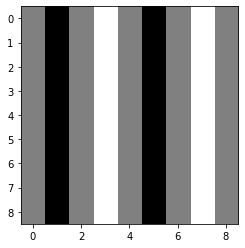

In [547]:
image0 = numpy.array([
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
], dtype=numpy.uint8)
imshow(image0, cmap='gray')

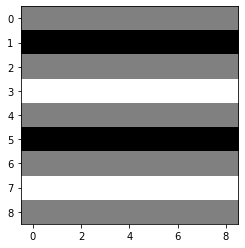

In [548]:
image1 = numpy.array([
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
], dtype=numpy.uint8)
imshow(image1, cmap='gray')

## Run Images Through Model

The images need to be in a slightly different format for Keras than they do for the imshow command. Right now, they are 9x9 arrays, and we need them to be 9x9x1 -- three dimensional instead of two.

In [549]:
images = []
for image in [image0, image1]: # You may find it easier to take one of these out, to look at them one at a time
    images.append(numpy.resize(image, (image_size, image_size, 1)))

And now we give these images to our model and take a look at what the filter has found. 

In [550]:
model0.predict(numpy.array(images))

array([[[[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]]],


       [[[    0.],
         [    0.],
         [    0

## Model 1 Questions

### Answer these before going on to the second model!

**1. There are a lot of numbers in the output above: 2 arrays of 7 arrays of 7 arrays of a single element. Why are they in groups of seven?**

The numbers are grouped in sevens because when you run a 3x3 kernel over a 9x9 image, there are 7 possible locations for the kernel. If the image is vertical bars of color, then changes to the vertical position of the kernel won't affect the output because the new 3x3 subsection of the image is going to be identical to the previous; similarly, if the image is horizontal bars, changes in the horizontal position won't affect the output. But, there are 7 different locations when traveling in the perpendicular direction, rows or columns: [1,2,3], [2,3,4], [3,4,5], [4,5,6], [5,6,7], [6,7,8], [7,8,9].

**2. When we created the model, we asked it to have one filter. In which image do we get the highest absolute values in the filter outputs? How does this relate to the pattern of weights that was set?**

We get the highest absolute values for the filter output in image1, the horizontal bars of color. In fact, we actually get both the highest negative value and the highest positive value from this image. The lowest value is -1149, which is from the [2,3,4] and [5,6,7] kernel locations. We get this large negative value because the kernel is [[1,1,1], [-1,-1,-1], [-1,-1,-1]], which rewards large values in the first row and penalizes large values in the second and third rows. Because the [2,3,4] and [5,6,7] rows are both [black, gray, white] (in numbers [0,128,255]) the image is the opposite of what the kernel is optimizing for. In contrast (pun intended), for the highest value the image colors are [white, gray, black] (in numbers [255,128,0]). These numbers fit much better with the reward system set up by the weights - there are large numbers in the first row and smaller numbers in the next two rows.

## Second Model

Let's move to a slightly more complex model. Now, there are two convolutional layers, the first with two filters and the second with one filter. One other difference is that we're going to be taking strides so that we only examine each pixel once, instead of looking at overlapping groups. This makes it a little simpler to understand the manual weights.

In [551]:
model1 = Sequential()
model1.add(Conv2D(filters=2,
                  kernel_size=kernel_size,
                  strides=(3,3),
                  input_shape=(image_size, image_size, 1)))
model1.add(Conv2D(filters=1, kernel_size=kernel_size))

With a different model structure, we will have a different number of weights to fit.

In [552]:
weights = model1.get_weights()
weights

[array([[[[ 0.20391491,  0.3966678 ]],
 
         [[ 0.01203915,  0.46740392]],
 
         [[-0.1538831 ,  0.1201258 ]]],
 
 
        [[[ 0.08799365,  0.22938034]],
 
         [[ 0.2421085 ,  0.11076722]],
 
         [[ 0.10481158,  0.2764347 ]]],
 
 
        [[[-0.23534508, -0.02111658]],
 
         [[-0.32134444, -0.46356285]],
 
         [[ 0.3014944 ,  0.08511123]]]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[[[-0.19803995],
          [-0.30068493]],
 
         [[ 0.3738223 ],
          [-0.09950814]],
 
         [[ 0.46282086],
          [-0.3618188 ]]],
 
 
        [[[-0.16708967],
          [ 0.43161383]],
 
         [[ 0.3114206 ],
          [-0.2813509 ]],
 
         [[ 0.09640345],
          [ 0.17971733]]],
 
 
        [[[-0.22954455],
          [-0.1721611 ]],
 
         [[-0.325023  ],
          [-0.06483668]],
 
         [[ 0.30610684],
          [ 0.03300729]]]], dtype=float32),
 array([0.], dtype=float32)]

As before, we manually set the weights to match some specific patterns.

In [553]:
layer_num = 0
filter_num = 0

# looking for:
# \
#  \
#   \

for y in range(kernel_size):
    for x in range(kernel_size):
        if y == x:
            weights[layer_num][y][x][0][filter_num] = 1
        else:
            weights[layer_num][y][x][0][filter_num] = -1

# looking for:
#   /
#  /
# /
            
filter_num = 1
for y in range(kernel_size):
    for x in range(kernel_size):
        if kernel_size - 1 - y == x:
            weights[layer_num][y][x][0][filter_num] = 1
        else:
            weights[layer_num][y][x][0][filter_num] = -1

In [554]:
# layer 1 is for setting the biases of the first layer.
# They are zero by default, so leave them that way and
# move on to layer 2, which contains the weights for the
# filters of the second layer.
layer_num = 2
filter_num = 0
for y in range(kernel_size):
    for x in range(kernel_size):
        input_filter_num = 0
        if y == x:
            weights[layer_num][y][x][input_filter_num][filter_num] = 1
        else:
            weights[layer_num][y][x][input_filter_num][filter_num] = -0.25
        input_filter_num = 1
        if kernel_size - 1 - y == x:
            weights[layer_num][y][x][input_filter_num][filter_num] = 1
        else:
            weights[layer_num][y][x][input_filter_num][filter_num] = -0.25
weights

[array([[[[ 1., -1.]],
 
         [[-1., -1.]],
 
         [[-1.,  1.]]],
 
 
        [[[-1., -1.]],
 
         [[ 1.,  1.]],
 
         [[-1., -1.]]],
 
 
        [[[-1.,  1.]],
 
         [[-1., -1.]],
 
         [[ 1., -1.]]]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[[[ 1.  ],
          [-0.25]],
 
         [[-0.25],
          [-0.25]],
 
         [[-0.25],
          [ 1.  ]]],
 
 
        [[[-0.25],
          [-0.25]],
 
         [[ 1.  ],
          [ 1.  ]],
 
         [[-0.25],
          [-0.25]]],
 
 
        [[[-0.25],
          [ 1.  ]],
 
         [[-0.25],
          [-0.25]],
 
         [[ 1.  ],
          [-0.25]]]], dtype=float32),
 array([0.], dtype=float32)]

And save the weights back into the model.

In [555]:
model1.set_weights(weights)

Again, run our test images through the model to see what the filters output.

In [556]:
def predict_images(images):
    resized_images = []
    for image in images:
        resized_images.append(numpy.resize(image, (image_size, image_size, 1)))
    return model1.predict(numpy.array(resized_images))

In [557]:
predict_images([image0, image1])

array([[[[-1150.]]],


       [[[-1150.]]]], dtype=float32)

## Exercise #1

Note above that neither image0 nor image1 gets a positive output. Create some images that do get positive ouputs from this model. The code below might help you get started.

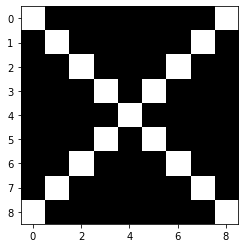

In [558]:
img1 = numpy.array([
    [255, 0, 0, 0, 0, 0, 0, 0, 255],
    [0, 255, 0, 0, 0, 0, 0, 255, 0],
    [0, 0, 255, 0, 0, 0, 255, 0, 0],
    [0, 0, 0, 255, 0, 255, 0, 0, 0],
    [0, 0, 0, 0, 255, 0, 0, 0, 0],
    [0, 0, 0, 255, 0, 255, 0, 0, 0],
    [0, 0, 255, 0, 0, 0, 255, 0, 0],
    [0, 255, 0, 0, 0, 0, 0, 255, 0],
    [255, 0, 0, 0, 0, 0, 0, 0, 255],
], dtype=numpy.uint8)
imshow(img1, cmap='gray', vmin=0, vmax=255)

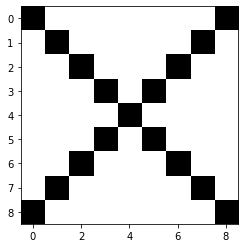

In [559]:
img2 = numpy.array([
    [0, 255, 255, 255, 255, 255, 255, 255, 0],
    [255, 0, 255, 255, 255, 255, 255, 0, 255],
    [255, 255, 0, 255, 255, 255, 0, 255, 255],
    [255, 255, 255, 0, 255, 0, 255, 255, 255],
    [255, 255, 255, 255, 0, 255, 255, 255, 255],
    [255, 255, 255, 0, 255, 0, 255, 255, 255],
    [255, 255, 0, 255, 255, 255, 0, 255, 255],
    [255, 0, 255, 255, 255, 255, 255, 0, 255],
    [0, 255, 255, 255, 255, 255, 255, 255, 0],
], dtype=numpy.uint8)
imshow(img2, cmap='gray', vmin=0, vmax=255)

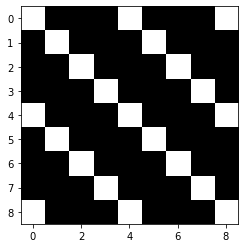

In [560]:
img3 = numpy.array([
    [255, 0, 0, 0, 255, 0, 0, 0, 255],
    [0, 255, 0, 0, 0, 255, 0, 0, 0],
    [0, 0, 255, 0, 0, 0, 255, 0, 0],
    [0, 0, 0, 255, 0, 0, 0, 255, 0],
    [255, 0, 0, 0, 255, 0, 0, 0, 255],
    [0, 255, 0, 0, 0, 255, 0, 0, 0],
    [0, 0, 255, 0, 0, 0, 255, 0, 0],
    [0, 0, 0, 255, 0, 0, 0, 255, 0],
    [255, 0, 0, 0, 255, 0, 0, 0, 255],
], dtype=numpy.uint8)
imshow(img3, cmap='gray', vmin=0, vmax=255)

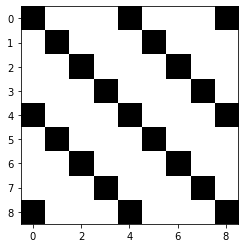

In [561]:
img4 = numpy.array([
    [0, 255, 255, 255, 0, 255, 255, 255, 0],
    [255, 0, 255, 255, 255, 0, 255, 255, 255],
    [255, 255, 0, 255, 255, 255, 0, 255, 255],
    [255, 255, 255, 0, 255, 255, 255, 0, 255],
    [0, 255, 255, 255, 0, 255, 255, 255, 0],
    [255, 0, 255, 255, 255, 0, 255, 255, 255],
    [255, 255, 0, 255, 255, 255, 0, 255, 255],
    [255, 255, 255, 0, 255, 255, 255, 0, 255],
    [0, 255, 255, 255, 0, 255, 255, 255, 0],
], dtype=numpy.uint8)
imshow(img4, cmap='gray', vmin=0, vmax=255)

In [562]:
predict_images([img1, img2, img3, img4])

array([[[[ 3825. ]]],


       [[[-6120. ]]],


       [[[ 4462.5]]],


       [[[-6757.5]]]], dtype=float32)

### Analysis

We see here that a black background with a white cross gets a large positive output, and a white background with a black cross gets a large negative output. Similarly, a black background with white diagonal stripes gets a large positive output and a white background with black diagonal stripes gets a large negative output. This is because the model rewards lighter-shaded diagonal lines, whether forwards or backwards, by rewarding the pixels on the line and penalizing the pixels outside of the line. Because white is 255 and black is 0, the highest possible score will be obtained by fitting in the most diagonal white lines in the image without penalizing any white squares. The cross is a pretty good solution, but it turns out we can add 4 more white squares by using diagonal stripes, which is why the black background with white stripes gets the highest score and the white background with black stripes the lowest.

## Exercise #2

### Optional

Add additional filters to the model or create a new model with your own filters. Create images that get positive weights for different patterns of filters.

In [563]:
model2 = Sequential()
model2.add(Conv2D(filters=1,
                  kernel_size=kernel_size,
                  strides=(3,3),
                  input_shape=(image_size, image_size, 1)))
model2.add(Conv2D(filters=1, kernel_size=kernel_size))

In [564]:
weights = model2.get_weights()
weights

[array([[[[ 0.29888678]],
 
         [[ 0.48666382]],
 
         [[-0.2641318 ]]],
 
 
        [[[-0.0382393 ]],
 
         [[-0.0117386 ]],
 
         [[ 0.36839503]]],
 
 
        [[[-0.29574242]],
 
         [[ 0.36286753]],
 
         [[ 0.3576625 ]]]], dtype=float32),
 array([0.], dtype=float32),
 array([[[[-0.01777595]],
 
         [[ 0.50540173]],
 
         [[ 0.358867  ]]],
 
 
        [[[-0.29409182]],
 
         [[-0.07626432]],
 
         [[-0.4183684 ]]],
 
 
        [[[-0.4273405 ]],
 
         [[-0.3628378 ]],
 
         [[-0.2938065 ]]]], dtype=float32),
 array([0.], dtype=float32)]

In [565]:
layer_num = 0
filter_num = 0

# looking for:
# \\\
# \ \
# \\\

for y in range(kernel_size):
    for x in range(kernel_size):
        if x == 1 and y == 1:
            weights[layer_num][y][x][0][filter_num] = -1
        else:
            weights[layer_num][y][x][0][filter_num] = 1

In [566]:
layer_num = 2
filter_num = 0
for y in range(kernel_size):
    for x in range(kernel_size):
        if x == 1 and y == 1:
            weights[layer_num][y][x][0][filter_num] = -0.25
        else:
            weights[layer_num][y][x][0][filter_num] = 1
weights

[array([[[[ 1.]],
 
         [[ 1.]],
 
         [[ 1.]]],
 
 
        [[[ 1.]],
 
         [[-1.]],
 
         [[ 1.]]],
 
 
        [[[ 1.]],
 
         [[ 1.]],
 
         [[ 1.]]]], dtype=float32),
 array([0.], dtype=float32),
 array([[[[ 1.  ]],
 
         [[ 1.  ]],
 
         [[ 1.  ]]],
 
 
        [[[ 1.  ]],
 
         [[-0.25]],
 
         [[ 1.  ]]],
 
 
        [[[ 1.  ]],
 
         [[ 1.  ]],
 
         [[ 1.  ]]]], dtype=float32),
 array([0.], dtype=float32)]

In [567]:
model2.set_weights(weights)

In [568]:
def predict_images2(images):
    resized_images = []
    for image in images:
        resized_images.append(numpy.resize(image, (image_size, image_size, 1)))
    return model2.predict(numpy.array(resized_images))

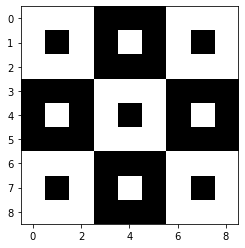

In [569]:
image_box = numpy.array([
    [255, 255, 255, 0, 0, 0, 255, 255, 255],
    [255, 0, 255, 0, 255, 0, 255, 0, 255],
    [255, 255, 255, 0, 0, 0, 255, 255, 255],
    [0, 0, 0, 255, 255, 255, 0, 0, 0],
    [0, 255, 0, 255, 0, 255, 0, 255, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0],
    [255, 255, 255, 0, 0, 0, 255, 255, 255],
    [255, 0, 255, 0, 255, 0, 255, 0, 255],
    [255, 255, 255, 0, 0, 0, 255, 255, 255],
], dtype=numpy.uint8)
imshow(image_box, cmap='gray', vmin=0, vmax=255)

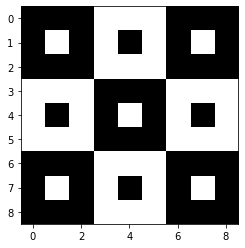

In [570]:
image_box2 = numpy.array([
    [0, 0, 0, 255, 255, 255, 0, 0, 0],
    [0, 255, 0, 255, 0, 255, 0, 255, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0],
    [255, 255, 255, 0, 0, 0, 255, 255, 255],
    [255, 0, 255, 0, 255, 0, 255, 0, 255],
    [255, 255, 255, 0, 0, 0, 255, 255, 255],
    [0, 0, 0, 255, 255, 255, 0, 0, 0],
    [0, 255, 0, 255, 0, 255, 0, 255, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0],
], dtype=numpy.uint8)
imshow(image_box2, cmap='gray', vmin=0, vmax=255)

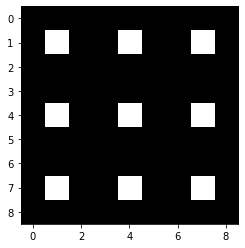

In [571]:
image_box3 = numpy.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 0, 0, 255, 0, 0, 255, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 0, 0, 255, 0, 0, 255, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 0, 0, 255, 0, 0, 255, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
], dtype=numpy.uint8)
imshow(image_box3, cmap='gray', vmin=0, vmax=255)

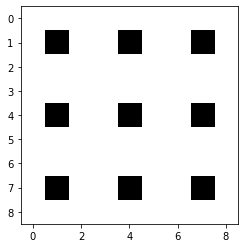

In [572]:
image_box4 = numpy.array([
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [255, 0, 255, 255, 0, 255, 255, 0, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
], dtype=numpy.uint8)
imshow(image_box4, cmap='gray', vmin=0, vmax=255)

In [573]:
predict_images2([image_box, image_box2, image_box3, image_box4])

array([[[[ 6630.  ]]],


       [[[ 7203.75]]],


       [[[-1976.25]]],


       [[[15810.  ]]]], dtype=float32)

## Analysis

These results make sense. When I assigned the weights, I rewarded the pixels on the outside of each 3x3 box and penalized the pixel in the middle. Thus, the highest value would be when the pixels on the outside had high positive values and the pixel in the middle had low positive values (because negative values aren't possible). The white box with a black center fits this criteria the best, and has the highest score of 15510.